[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch05_code.ipynb)

In [1]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

#from IPython.display import Math, HTML
#def enable_sympy_in_cell():
#  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))
#get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)

# Chapter 5: Equation solving

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Updated source code listings for Numerical Python - A Practical Techniques Approach for Industry (ISBN 978-1-484205-54-9).

In this chapter, we use `Sympy` for solving equations symbolically, when possible, and use the `linalg`  module from the `Scipy` library for numerically solving linear equation systems. For tackling
nonlinear problems, we will use the root-finding functions in the `optimize` module of `Scipy`.

## Importing modules

The Scipy package `scipy` should be considered a collection of modules that are selectively imported when
required. In this chapter we will use the `scipy.linalg` module, for solving linear systems of equations; and
the `scipy.optimize` module, for solving nonlinear equations.

In [2]:
from scipy import linalg as la
from scipy import optimize

In [3]:
import sympy
sympy.init_printing()
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

## Linear equation systems

$\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n}\\ 
a_{21} & a_{22} & \cdots & a_{2n}\\ 
\vdots & \vdots & \ddots & \vdots\\ 
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
\begin{pmatrix}
x_1\\ 
x_2\\ 
\vdots\\ 
x_n
\end{pmatrix}=
\begin{pmatrix}
b_1\\ 
b_2\\ 
\vdots\\ 
b_m
\end{pmatrix}$

or

simply $\mathbf{A}\mathbf{x}=\mathbf{b}$

### Square systems

$\begin{align*}
2x_1 +3x_2 &= 4\\ 
5x_1 +4x_2 &= 3 
\end{align*}$

In [4]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

In [5]:
x1 = np.linspace(-4, 2, 100)

x2_1 = (4 -2*x1)/3
x2_2 = (3 -5*x1)/4

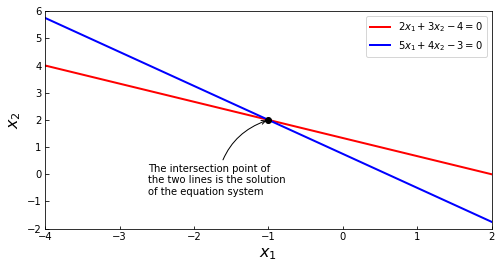

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("""The intersection point of
the two lines is the solution
of the equation system""",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-0.3"))

ax.set_xlim([-4, 2])
ax.set_ylim([-2, 6])
ax.tick_params(which='both', direction='in')
ax.set_xlabel(r"$x_1$", fontsize=16)
ax.set_ylabel(r"$x_2$", fontsize=16)
ax.legend();

#### Symbolic approach

In [9]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [10]:
A.rank()

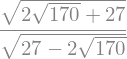

In [11]:
A.condition_number()

In [12]:
sympy.N(_)

In [13]:
A.norm()

In [14]:
sympy.N(_)

---

In [16]:
L, U, _ = A.LUdecomposition()

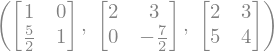

In [17]:
L, U, L * U

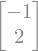

In [18]:
x = A.solve(b); x  # equivalent to A.LUsolve(b)

#### Numerical approach

In [19]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [20]:
np.linalg.matrix_rank(A)

2

In [21]:
np.linalg.cond(A)

In [17]:
np.linalg.norm(A)

---

In [22]:
P, L, U = la.lu(A)

In [23]:
P

array([[0., 1.],
       [1., 0.]])

In [24]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [21]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [22]:
np.dot(P, np.dot(L, U))

array([[2., 3.],
       [5., 4.]])

In [23]:
la.solve(A, b)

array([-1.,  2.])

---

The advantage of using `Sympy` is of course that we may obtain exact results and we can also include symbolic variables in the matrices. However, not all problems are solvable symbolically, or it may give exceedingly lengthy results. The advantage of using a numerical approach with `Numpy/Scipy`, on the other hand, is that we are guaranteed to obtain a result, although it will be an approximate solution due to  floating-point errors. See the code below for an example that illustrates the differences between the symbolic and numerical approaches, and for an example that show numerical approaches can be sensitive for equation systems with large condition numbers. In this example we solve the equation system

$\begin{pmatrix}
1 & \sqrt{p}\\ 
1 & \frac{1}{\sqrt{p}}
\end{pmatrix}
\begin{pmatrix}
x_1\\ x_2
\end{pmatrix}=
\begin{pmatrix}
1\\ 2
\end{pmatrix}$

which for `p=1` is singular and for `p` in the vicinity of one is ill conditioned. A comparison between this symbolic solution and the numerical solution is shown in Figure below. Here the errors in the numerical solution are due to numerical floating-point errors, and the numerical errors are significantly larger in the vicinity of `p=1`, where the system has a large condition number. Also, if there are other sources of errors in either `A` or `b`, the corresponding errors in `x` can be even more severe.

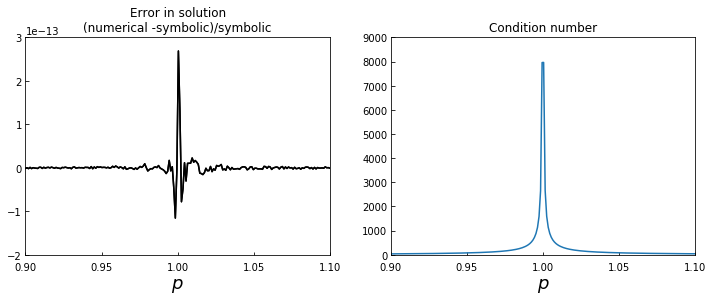

In [24]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical -symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[0].set_xlim([0.9, 1.1])
axes[0].set_ylim([-2.0e-13, 3.0e-13])
axes[0].tick_params(which='both', direction='in')
axes[0].tick_params(axis='x', pad=7)
axes[0].set_xticks(np.arange(0.9, 1.1, 0.05))

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)
     
axes[1].set_xlim([0.9, 1.1])
axes[1].set_ylim([0, 9000])
axes[1].tick_params(which='both', direction='in')
axes[1].tick_params(axis='x', pad=7)
axes[1].set_xticks(np.arange(0.9, 1.1, 0.05));

#fig.tight_layout()

### Rectangular system

#### Underdetermined

Rectangular systems, with $m\times n$, can be either underdetermined or overdetermined. Underdetermined systems have more variables than equations, so the solution cannot be fully determined. Therefore, for such a system, the solution must be given in terms of the remaining free variables. This makes it difficult to treat this type of problem numerically, but a symbolic approach can often be used instead. For example, consider the underdetermined linear equation system

$\begin{pmatrix}
1 & 2 & 3\\ 
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\x_3
\end{pmatrix}=
\begin{pmatrix}
7\\8
\end{pmatrix}$

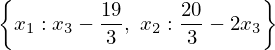

In [25]:
x_vars = sympy.symbols("x_1, x_2, x_3")
x = sympy.Matrix(x_vars)
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

#### Overdetermined: least squares

It is often interesting to find an approximate solution to an overdetermined system. An example of when this situation arises is data fitting: Say we have a model where a variable $y$ is a quadratic polynomial in the variable $x$, so that $y = A + Bx +Cx^2$ , and that we would like to fit this model to experimental data. Here $y$ is nonlinear in $x$, but $y$ is linear in the three unknown coefficients $A$,
$B$ and $C$, and this fact can be used to write the model as a linear equation system. If we collect data for
$m$ pairs $\left\{(x_i, y_i)\right\}_{i=1}^{m}$ of the variables $x$ and $y$, we can write the model as an $m \times 3$ equation system:

$\begin{pmatrix}
1 & x_1 & x_1^2\\ 
\vdots & \vdots & \vdots\\ 
1 & x_m & x_m^2
\end{pmatrix}
\begin{pmatrix}
A\\ 
B\\ 
C
\end{pmatrix} =
\begin{pmatrix}
y_1\\ 
\vdots\\ 
y_m
\end{pmatrix}$

for $m> 3$ , there is in general no exact solution, and we need to introduce an approximate
solution that give a best fit for the overdetermined system. A natural definition of best fit for the
overdetermined system $\mathbf{A}\mathbf{x} \approx \mathbf{b}$, is to minimize the sum of square error, 
$\min_x \sum_{i=1}^m r_i^2 $, where $\mathbf{r} = \mathbf{b} - \mathbf{A}\mathbf{x}$ is the
residual vector. This leads to the least square solution of the problem $\mathbf{A}\mathbf{x} \approx \mathbf{b}$, which minimizes the distances between the data points and the linear solution. In Sympy we can solve for the least square solution of an
overdetermined system using the `solve_least_squares` method, and for numerical problems we can use
the Scipy function `la.lstsq`.

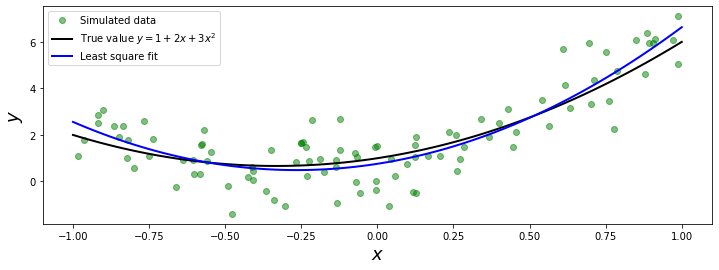

In [26]:
np.random.seed(1234)

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b*x + c*x**2

# simulate noisy data points
m = 100
X = 1 - 2*np.random.rand(m)
Y = a + b*X + c*X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1]*x + sol[2]*x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

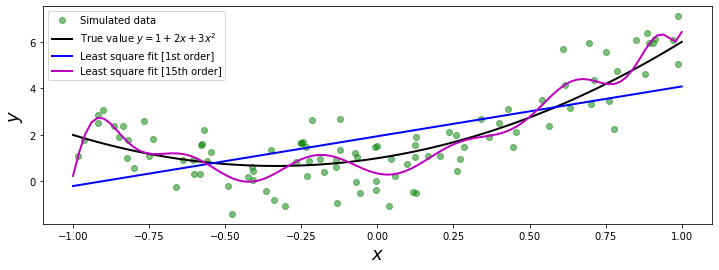

In [27]:
# fit the data to the model using linear least square: 

# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s*x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s*x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

## Eigenvalue problems

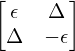

In [28]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]]); H 

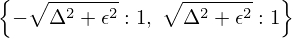

In [29]:
H.eigenvals()

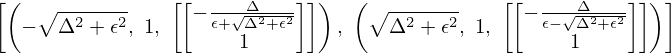

In [30]:
H.eigenvects()

In [31]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()

In [32]:
sympy.simplify(evec1[0].T*evec2[0])

Obtaining analytical expressions for eigenvalues and eigenvectors using these methods is often very
desirable indeed, but unfortunately it only works for small matrices.

---

Thus, for larger systems we must resort to a fully numerical approach. For
this we can use the `la.eigvals` and `la.eig` functions in the Scipy linear algebra package. Matrices that are
either Hermitian or real symmetric have real-valued eigenvalues, and for such matrices it is advantageous to
instead use the functions `la.eigvalsh` and `la.eigh`, which guarantees that the eigenvalues returned by the
function is stored in a Numpy array with real values.

In [33]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]]); A

array([[1, 3, 5],
       [3, 5, 3],
       [5, 3, 9]])

In [34]:
la.eigvals(A)

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [35]:
evals, evecs = la.eig(A)

In [36]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [37]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

In [38]:
evals, evecs = la.eigh(A)

In [39]:
evecs

array([[ 0.90353276, -0.04009445, -0.42663918],
       [-0.24498225, -0.8651975 , -0.43751227],
       [-0.35158534,  0.49982569, -0.79155671]])

## Nonlinear equations

A nonlinear equation can always be written on the form $f(x) = 0$, where $f(x)$ is a nonlinear function and
we seek the value of $x$ (which can be a scalar or a vector) such that $f(x)$ is zero. This $x$ is called the root of $f(x) = 0$, and equation solving is therefore often referred to as root finding.

### Univariate equations

In Sympy we can solve many analytically solvable univariate and nonlinear equations using the
`sympy.solve` function. For example,

In [40]:
x, a, b, c = sympy.symbols("x, a, b, c")

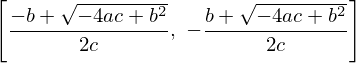

In [41]:
sympy.solve(a + b*x + c*x**2, x)

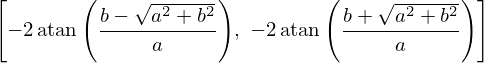

In [42]:
sympy.solve(a*sympy.cos(x) - b*sympy.sin(x), x)

In [43]:
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

In this type of situation we need to resort to various numerical techniques. As a first step, it is often very
useful to graph the function. This can give important clues about the number of solutions to the equation,
and their approximate locations.

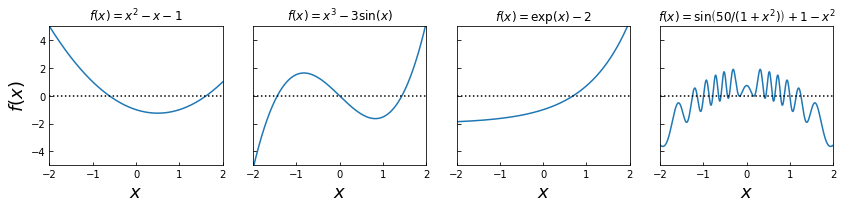

In [44]:
x = np.linspace(-2, 2, 1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3*np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50/(1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_xlim(-2, 2)
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].tick_params(which='both', direction='in')
    axes[n].set_xlabel(r'$x$', fontsize=18)
    
axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
fig.tight_layout()

#### Bisection

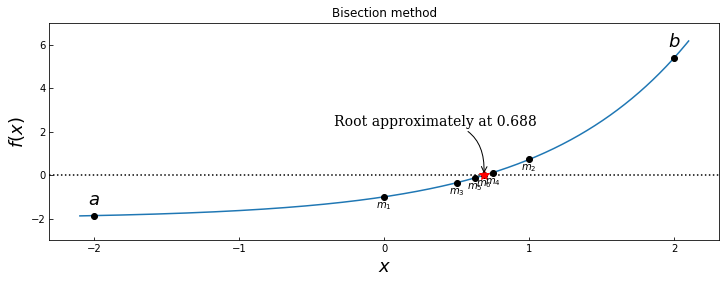

In [45]:
# define a function, desired tolerance and starting interval [a, b]
x = np.linspace(-2.1, 2.1, 1000)
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim(-3, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.tick_params(which='both', direction='in')

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method");

#fig.tight_layout()

#### Newton

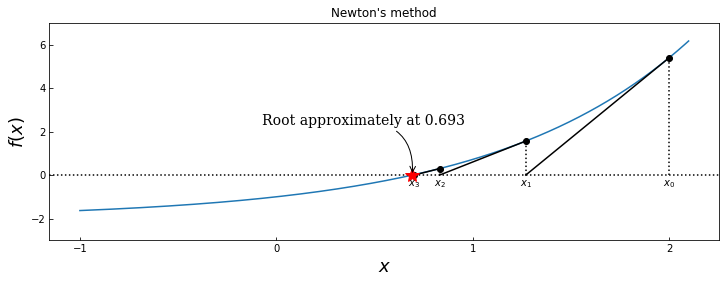

In [46]:
s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim(-3, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.tick_params(which='both', direction='in')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method");

#fig.tight_layout()

The Scipy optimize module provides multiple functions for numerical root finding. The `optimize.bisect`
and `optimize.newton` functions implement variants of bisection and Newton methods.

In [47]:
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [48]:
x_root_guess = 2
f = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)

In [49]:
optimize.newton(f, x_root_guess)

In [50]:
optimize.newton(f, x_root_guess, fprime=fprime)

The Scipy optimize module provides additional functions for root finding. In particular, the
`optimize.brentq` and `optimize.brenth` functions, which are variants of the bisection method, and also
work on an interval where the function changes sign.

In [51]:
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [52]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

In [53]:
optimize.ridder(lambda x: np.exp(x) - 2, -2, 2)

### Systems of nonlinear equations

For example, consider the following system of two multivariate and nonlinear equations:

$\begin{align}
y - x^3 -2x^2+1 &=0 \\ 
 y+x^2-1&= 0 
\end{align}$

In [54]:
def f(x):
    return [x[1] -x[0]**3 -2*x[0]**2 +1, x[1] +x[0]**2 -1]

In [55]:
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [56]:
optimize.broyden1(f, [1, 1])

array([0.73205046, 0.46410254])

In [57]:
optimize.broyden2(f, [1, 1])

array([0.73205083, 0.4641017 ])

---

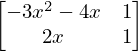

In [58]:
x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

In [59]:
def f_jacobian(x):
    return [[-3*x[0]**2 - 4*x[0], 1], [2*x[0], 1]]

In [60]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

---

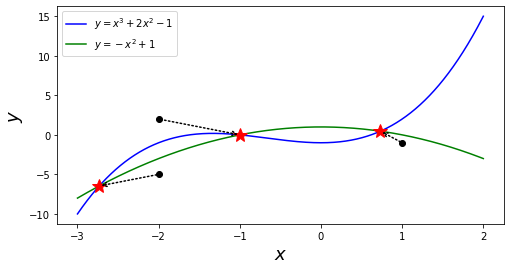

In [61]:
#def f(x):
#    return [x[1] -x[0]**3 -2*x[0]**2 +1, x[1] +x[0]**2 -1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 +2*x**2 -1
y2 = -x**2 +1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=1.5, linestyle=':'))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18);
#fig.tight_layout()

C:\Users\jesuskyr\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


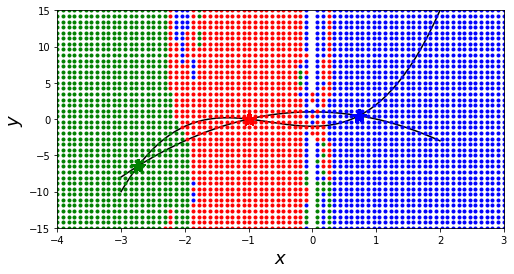

In [62]:
#def f(x):
#    return [x[1] -x[0]**3 -2*x[0]**2 +1, x[1] +x[0]**2 -1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 +2*x**2 -1
y2 = -x**2 +1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s -sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')

ax.set_xlim(-4, 3)
ax.set_ylim(-15, 15)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18);

#fig.tight_layout()

## Versions

In [63]:
from scipy import __version__
print("scipy: ", __version__)
print("sympy: ", sympy.__version__)
print("numpy: ", np.__version__)
print("matplotlib: ", mpl.__version__)

scipy:  1.3.1
sympy:  1.4
numpy:  1.16.5
matplotlib:  3.1.1
